In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
# -------------------

import statistics as stat
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [3]:
from google.colab import drive
drive.mount('/content/drive')
import os
directory = "/content/drive/MyDrive/Dataset/"
os.chdir(directory)

Mounted at /content/drive


In [4]:
!lsrain.csv

/bin/bash: line 1: lsrain.csv: command not found


In [5]:
file_name = "dengue_train.csv"

# 1. Load dataset as dataframe (csv file)
train_data = pd.read_csv(file_name)

In [6]:
# train_data = pd.read_csv('dengue_train.csv')


In [7]:
train_data

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,4/30/1990,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,5/7/1990,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,5/14/1990,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,5/21/1990,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,5/28/1990,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,5/28/2010,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5
1452,iq,2010,22,6/4/2010,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,8
1453,iq,2010,23,6/11/2010,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1
1454,iq,2010,24,6/18/2010,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1


In [8]:
train_data.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases'],
      dtype='object')

In [9]:
train_data.shape

(1456, 25)

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   week_start_date                        1456 non-null   object 
 4   ndvi_ne                                1262 non-null   float64
 5   ndvi_nw                                1404 non-null   float64
 6   ndvi_se                                1434 non-null   float64
 7   ndvi_sw                                1434 non-null   float64
 8   precipitation_amt_mm                   1443 non-null   float64
 9   reanalysis_air_temp_k                  1446 non-null   float64
 10  reanalysis_avg_temp_k                  1446 non-null   float64
 11  rean

In [11]:
train_data.head(10)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,4/30/1990,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,5/7/1990,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,5/14/1990,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,5/21/1990,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,5/28/1990,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
5,sj,1990,23,6/4/1990,NaN,0.174850,0.254314,0.181743,9.58,299.630000,...,79.891429,9.58,17.212857,2.100000,28.114286,6.942857,34.4,23.9,39.1,2
6,sj,1990,24,6/11/1990,0.112900,0.092800,0.205071,0.210271,3.48,299.207143,...,82.000000,3.48,17.234286,2.042857,27.414286,6.771429,32.2,23.3,29.7,4
7,sj,1990,25,6/18/1990,0.072500,0.072500,0.151471,0.133029,151.12,299.591429,...,83.375714,151.12,17.977143,1.571429,28.371429,7.685714,33.9,22.8,21.1,5
8,sj,1990,26,6/25/1990,0.102450,0.146175,0.125571,0.123600,19.32,299.578571,...,82.768571,19.32,17.790000,1.885714,28.328571,7.385714,33.9,22.8,21.1,10
9,sj,1990,27,7/2/1990,NaN,0.121550,0.160683,0.202567,14.41,300.154286,...,81.281429,14.41,18.071429,2.014286,28.328571,6.514286,33.9,24.4,1.1,6


In [12]:
train_data.sample(5)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
1098,iq,2003,33,8/13/2003,0.247114,0.171114,0.233743,0.263800,52.47,297.338571,...,83.927143,52.47,15.588571,10.657143,27.400000,10.050000,34.4,21.7,79.0,0
1333,iq,2008,8,2/19/2008,0.240950,0.223600,0.162043,0.187443,122.64,297.095714,...,92.370000,122.64,17.130000,7.614286,28.000000,10.800000,33.4,22.0,115.3,29
129,sj,1992,43,10/21/1992,-0.015600,0.031200,0.104217,0.112983,12.18,299.848571,...,77.875714,12.18,17.044286,2.514286,28.657143,7.457143,32.8,23.9,11.9,61
1100,iq,2003,35,8/27/2003,0.249586,0.212200,0.250814,0.265214,29.51,297.875714,...,85.725714,29.51,16.445714,10.885714,28.000000,12.100000,34.4,21.4,95.7,0
684,sj,2003,26,6/25/2003,-0.179800,-0.052450,0.118271,0.159729,17.92,299.911429,...,80.980000,17.92,17.754286,2.400000,28.028571,6.042857,32.2,24.4,0.6,14


In [13]:
train_data.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
count,1456.000000,1456.000000,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000,...,1446.000000,1443.000000,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000,1456.000000
mean,2001.031593,26.503434,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,...,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360,24.675137
std,5.408314,15.019437,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810,...,7.153897,43.715537,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314,43.596000
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,...,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000,0.000000
25%,1997.000000,13.750000,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,294.118929,...,77.177143,9.800000,15.557143,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000,5.000000
50%,2002.000000,26.500000,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714,...,80.301429,38.340000,17.087143,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000,12.000000
75%,2005.000000,39.250000,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,296.460000,...,86.357857,70.235000,17.978214,7.625000,28.157143,9.566667,33.900000,23.300000,53.900000,28.000000
max,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,...,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000,461.000000


In [14]:
train_data.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

In [15]:
train_data['ndvi_ne']

0       0.122600
1       0.169900
2       0.032250
3       0.128633
4       0.196200
          ...   
1451    0.342750
1452    0.160157
1453    0.247057
1454    0.333914
1455    0.298186
Name: ndvi_ne, Length: 1456, dtype: float64

In [16]:
result = train_data.loc[train_data['ndvi_ne'].isnull(), 'year']
print(result)

5       1990
9       1990
13      1990
14      1990
15      1990
        ... 
923     2008
927     2008
1018    2002
1170    2005
1430    2010
Name: year, Length: 194, dtype: int64


In [17]:
train_data.drop(train_data[train_data['reanalysis_sat_precip_amt_mm'].isnull()].index, inplace = True)

In [18]:
train_data.drop('week_start_date', axis = 1, inplace = True)

In [19]:
# train_data.drop(train_data[train_data['total_cases']  2].index, inplace = True)

In [20]:
train_data.shape

(1443, 24)

In [21]:
# The imputation strategy:  mean, median, most_frequent, constant

impute = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

list_of_features = ["reanalysis_min_air_temp_k"]

train_data[list_of_features] = impute.fit_transform(train_data[list_of_features])

In [22]:
# train_data.isnull().sum()

In [23]:
impute = SimpleImputer(missing_values=np.nan, strategy='median')

list_of_features = ["ndvi_ne"]

train_data[list_of_features] = impute.fit_transform(train_data[list_of_features])

In [24]:
# train_data.isnull().sum()

In [25]:
train_data.fillna(method='ffill', inplace=True)
train_data.isnull().sum()

city                                     0
year                                     0
weekofyear                               0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_precip_mm                        0
total_cases

In [26]:
train_data.sample(5)

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
370,sj,1997,24,0.119700,0.090400,0.147717,0.191414,0.00,300.001429,300.264286,...,79.745714,0.00,17.620000,2.871429,28.600000,7.000000,32.8,23.9,0.3,4
1371,iq,2008,46,0.304286,0.294643,0.306271,0.400386,60.36,298.498571,300.221429,...,88.328571,60.36,17.625714,10.014286,28.300000,12.866667,36.0,20.5,42.6,16
287,sj,1995,44,0.234600,0.078250,0.270071,0.285429,30.30,299.772857,299.942857,...,80.864286,30.30,17.670000,3.000000,28.042857,7.642857,33.9,23.3,13.5,40
1397,iq,2009,20,0.207743,0.227857,0.254200,0.216043,38.51,297.607143,299.007143,...,93.298571,38.51,17.858571,9.071429,28.075000,11.425000,35.0,22.0,11.2,1
647,sj,2002,41,-0.053850,-0.073900,0.242971,0.218729,17.48,300.728571,300.707143,...,78.808571,17.48,18.191429,2.728571,27.942857,6.685714,31.7,23.9,26.0,9


In [27]:
grouped = train_data.groupby(['city'])
sj_train_data= grouped.get_group("sj")
iq_train_data = grouped.get_group("iq")
sj_train_data.head()

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [28]:
# # Set up the LabelEncoder object
# enc = LabelEncoder()

# # Apply the encoding to the "Accessible" column
# train_data['city_enc'] = enc.fit_transform(train_data['city'])

# # Compare the two columns
# print(train_data[['city', 'city_enc']].sample(5))

<ipython-input-29-2bf4b558a2ea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sj_train_data['total_cases'] = sj_train_data['total_cases']
<ipython-input-29-2bf4b558a2ea>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sj_corr = sj_train_data.corr()


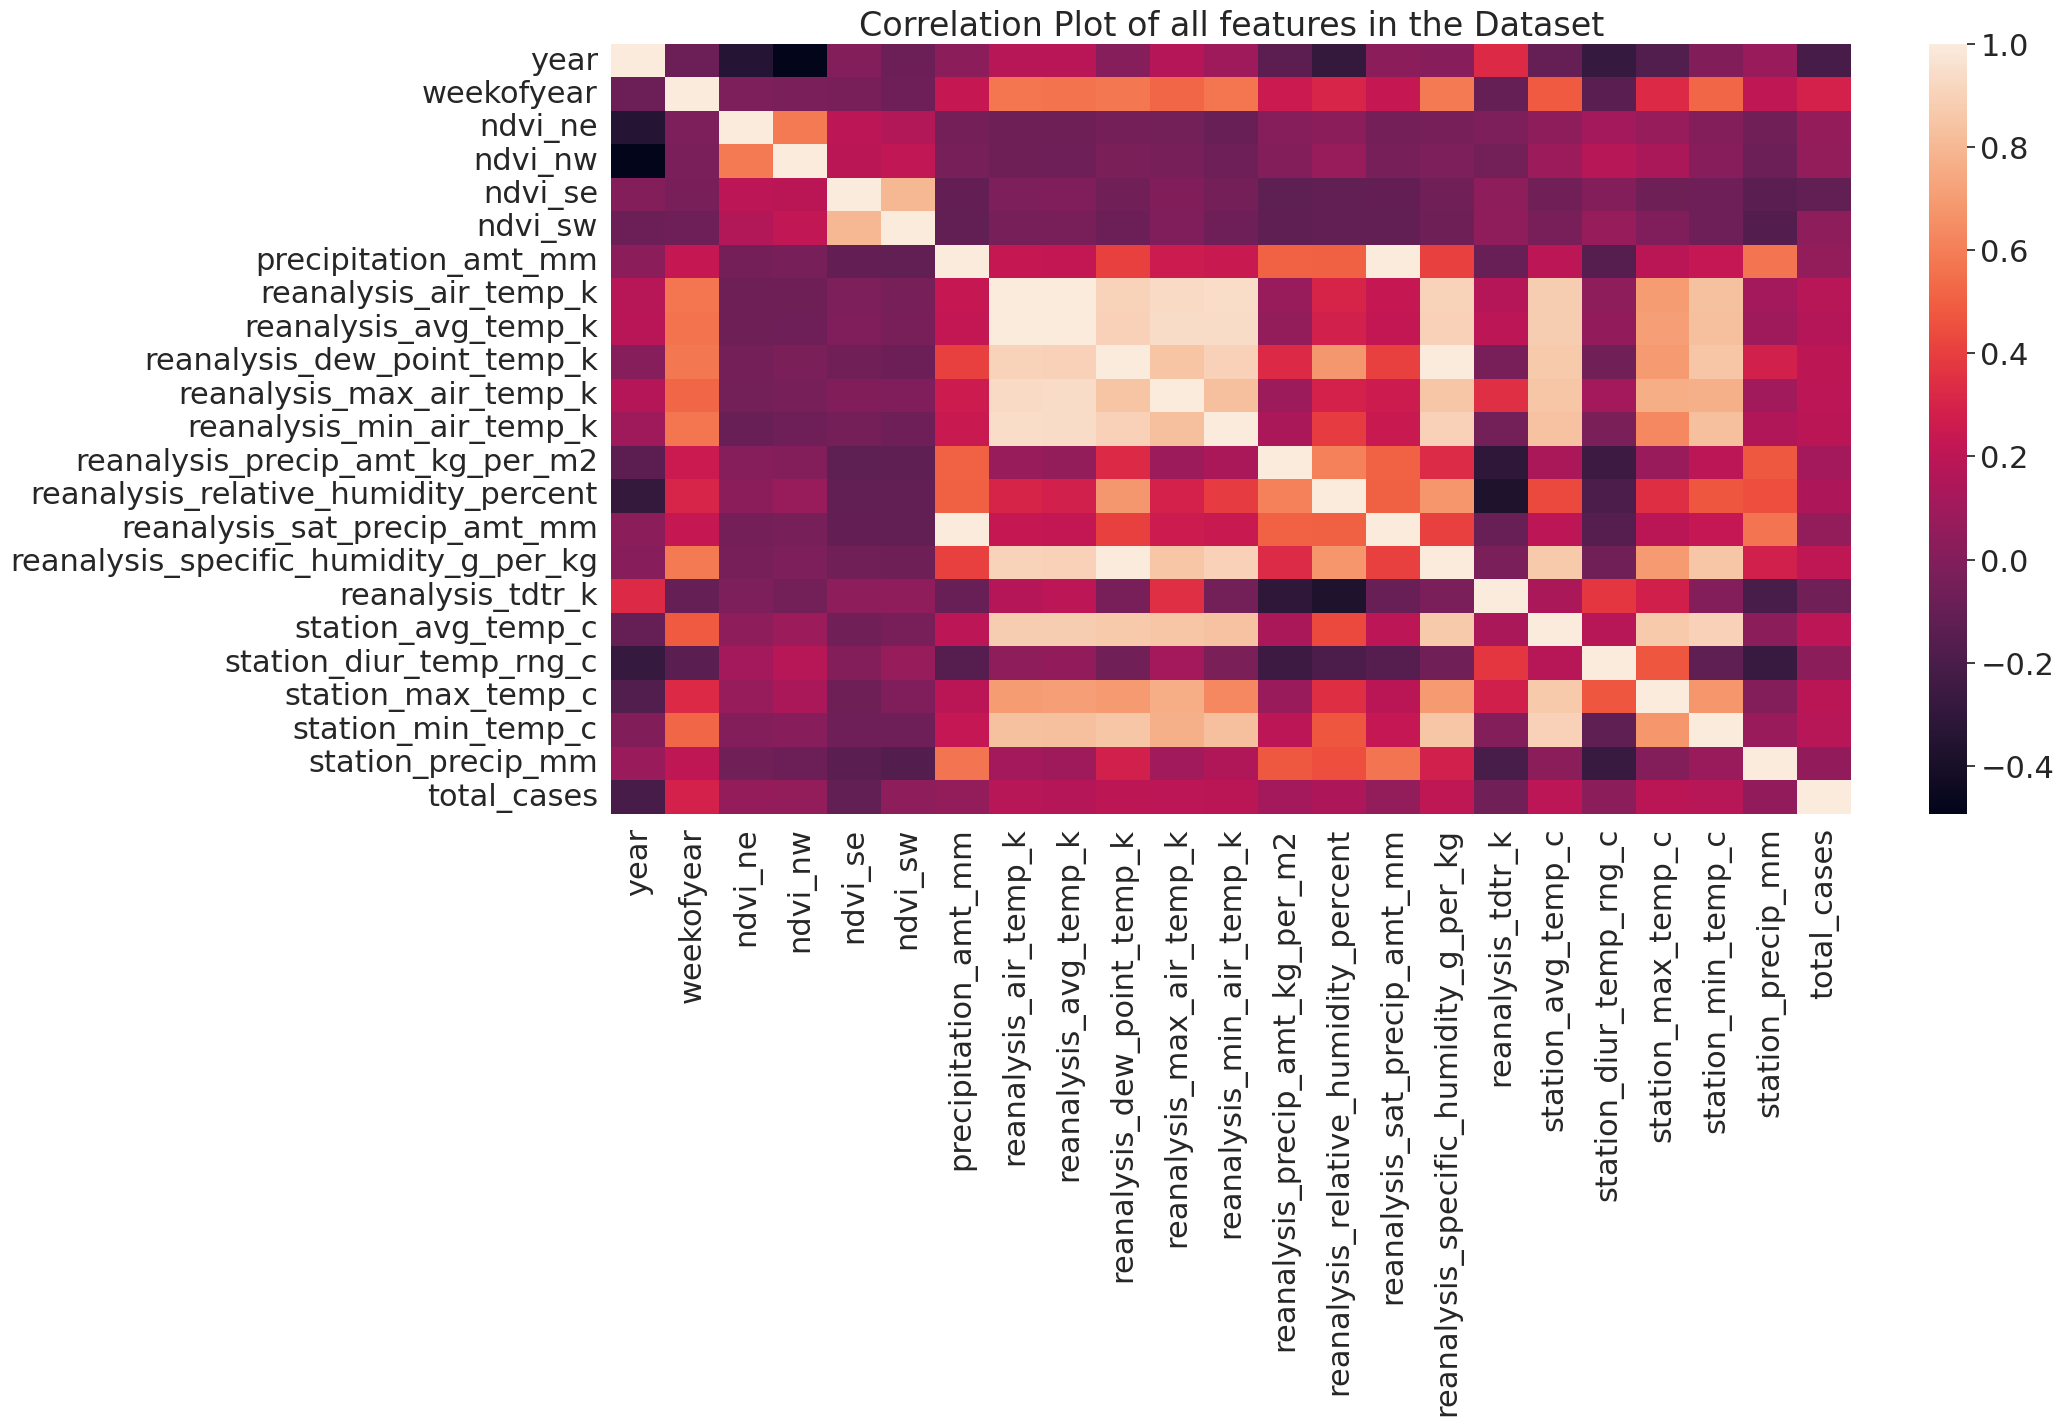

In [29]:
sj_train_data['total_cases'] = sj_train_data['total_cases']

sj_corr = sj_train_data.corr()

sns.set(font_scale = 2)
plt.figure(figsize=(20, 10))

sns.heatmap(sj_corr)
plt.title('Correlation Plot of all features in the Dataset')
plt.show()

<ipython-input-30-da639b41c037>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iq_train_data['total_cases'] = iq_train_data['total_cases']
<ipython-input-30-da639b41c037>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  iq_corr = iq_train_data.corr()


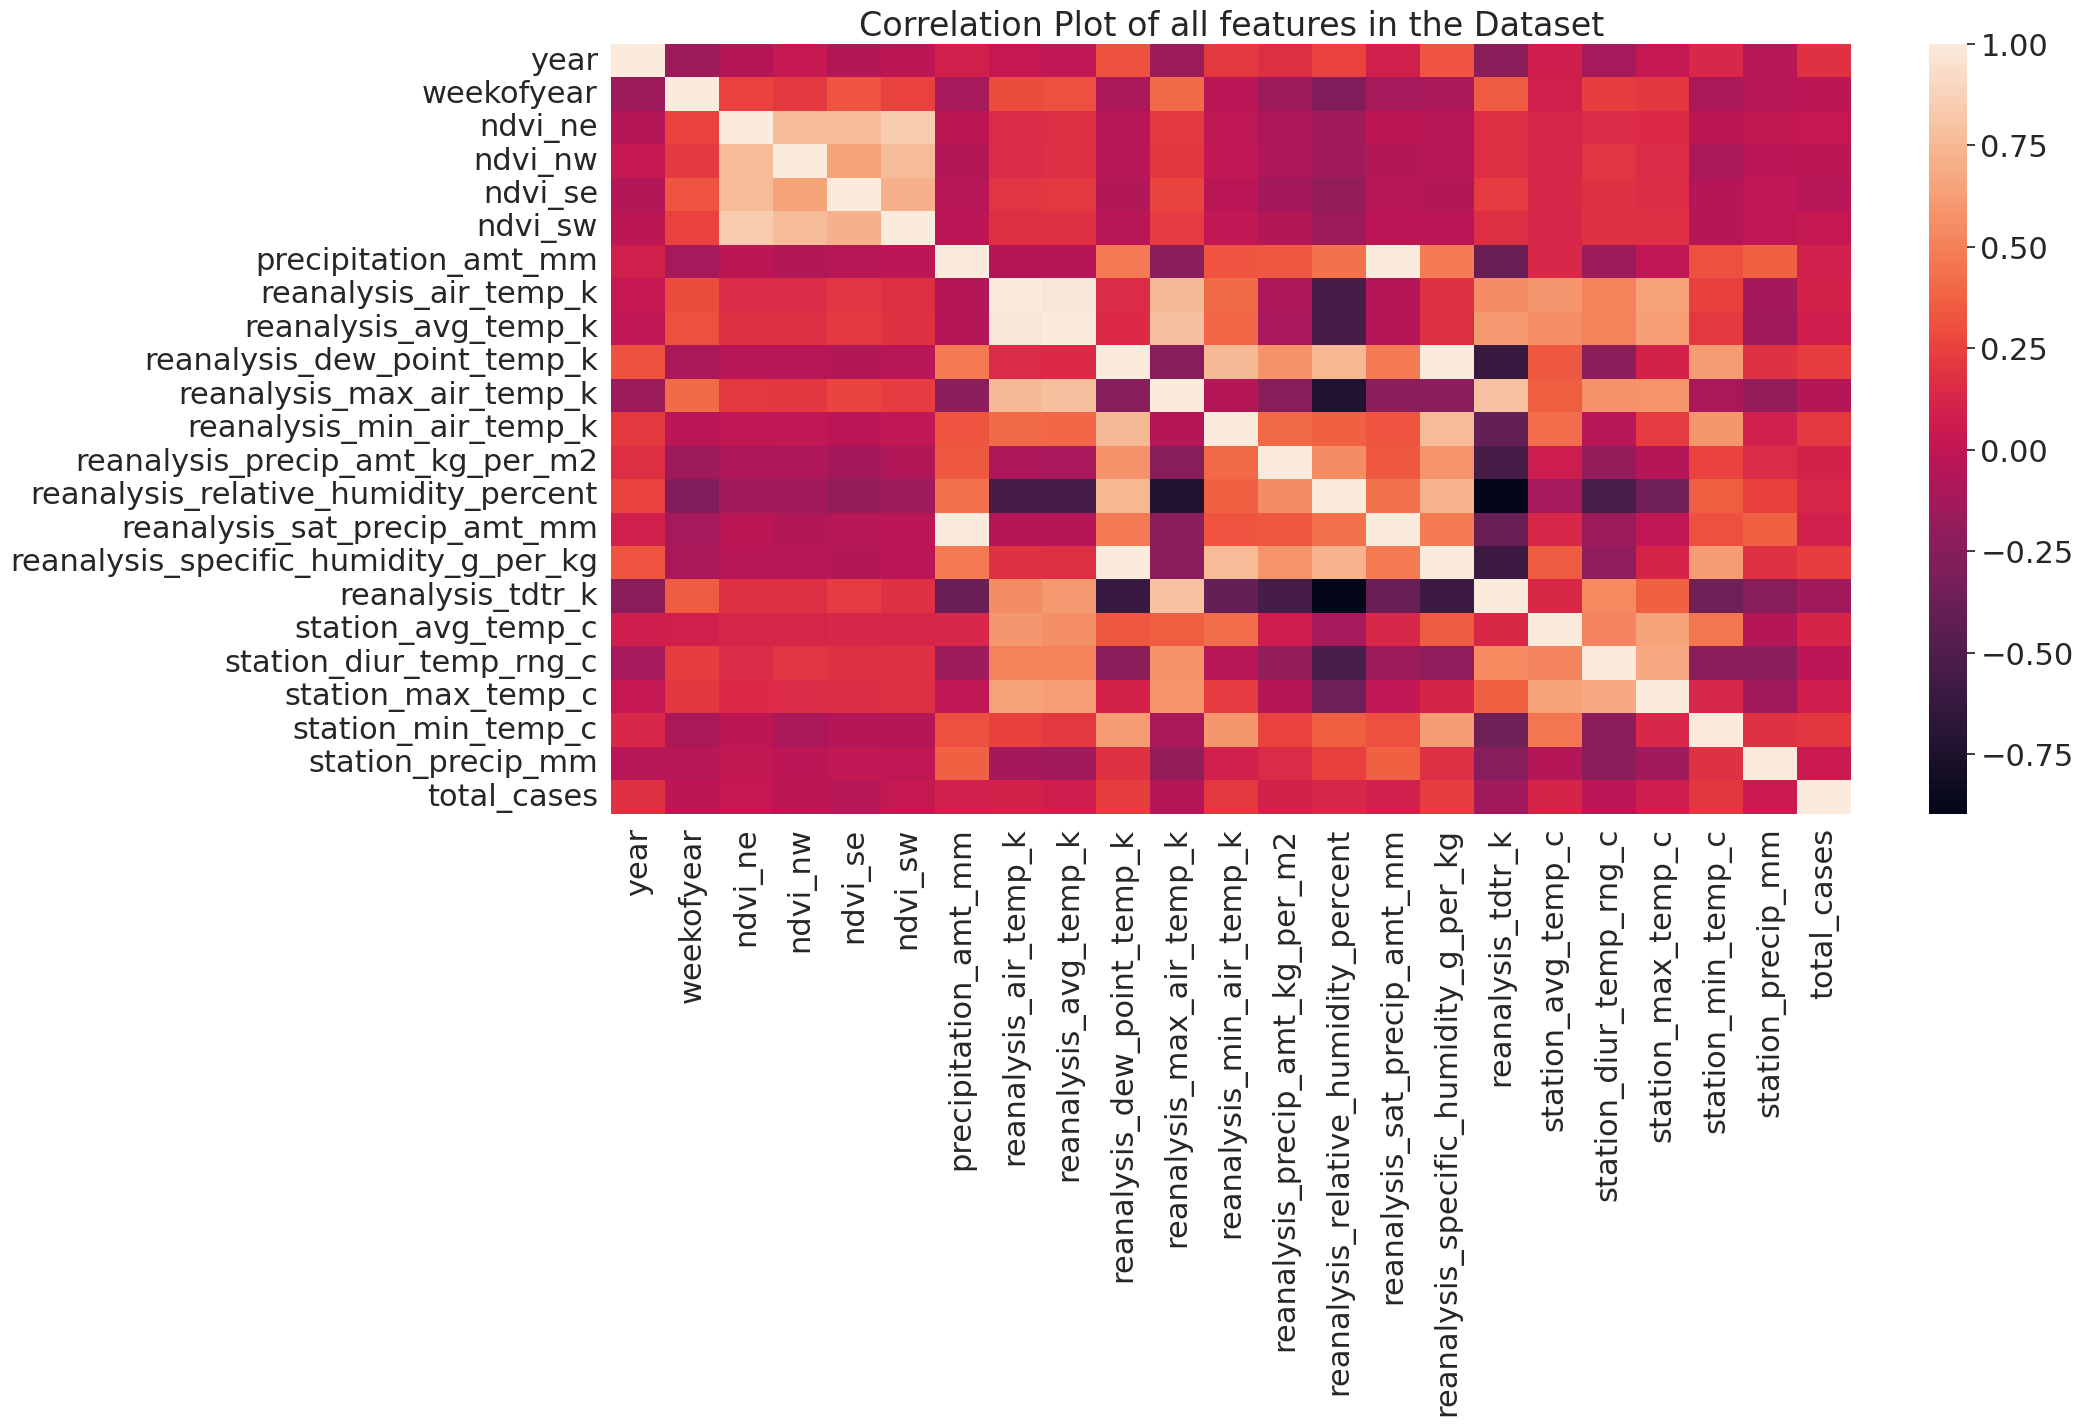

In [30]:
iq_train_data['total_cases'] = iq_train_data['total_cases']

iq_corr = iq_train_data.corr()

sns.set(font_scale = 2)
plt.figure(figsize=(20, 10))

sns.heatmap(iq_corr)
plt.title('Correlation Plot of all features in the Dataset')
plt.show()

We note the following for both the datasets:

-No variables are exceptionally good at predicting the label (total cases)

-The first 4 variables (Normalized Difference Vegetation Index) variables appear to be very weakly correlated with the other variables. They do not appear to be very useful in predicting the labels.

-Most of temperature variables in both datasets appear to be strongly correlated with one another.

<Axes: >

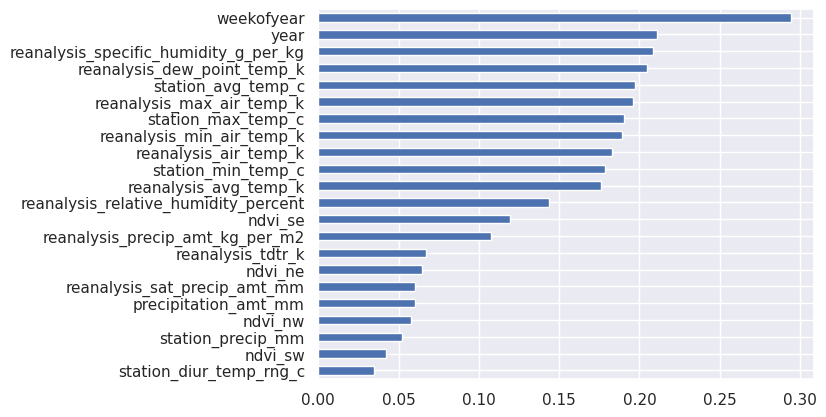

In [31]:
sns.set(font_scale = 1)
(abs(sj_corr)
 .total_cases
 .drop('total_cases')
#  .drop('weekofyear')
#  .drop('year')
 .sort_values()
 .plot
 .barh())

<Axes: >

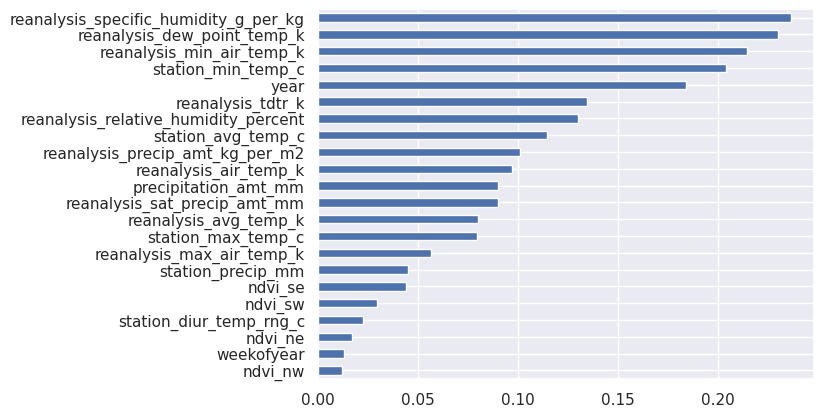

In [32]:
sns.set(font_scale = 1)
(abs(iq_corr)
 .total_cases
 .drop('total_cases')
 .sort_values()
 .plot
 .barh())


It seems that some variables are noticeably prominent on both bar graphs, implying that they might be shared factors influencing dengue cases. For instance, attributes like specific humidity (measured in g/kg), dew point temperature (measured in K), [reanalysis] minimum air temperature (measured in K), and [station] minimum air temperature (measured in C) show relatively robust correlations with the "total_cases" label.

In [33]:
#feature scaling
list_of_features = ['weekofyear',
       'ndvi_se','precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg',
       'station_avg_temp_c', 'station_max_temp_c',
       'station_min_temp_c']

scaler = MinMaxScaler()

sj_train_data[list_of_features] = scaler.fit_transform(sj_train_data[list_of_features])
iq_train_data[list_of_features] = scaler.fit_transform(iq_train_data[list_of_features])

<ipython-input-33-1f1847b8aaba>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sj_train_data[list_of_features] = scaler.fit_transform(sj_train_data[list_of_features])
<ipython-input-33-1f1847b8aaba>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iq_train_data[list_of_features] = scaler.fit_transform(iq_train_data[list_of_features])


In [34]:
# selecting features

sj_x_data = sj_train_data[[
       'ndvi_se','precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg',
       'station_avg_temp_c', 'station_max_temp_c',
       'station_min_temp_c']]
sj_y_data = sj_train_data[["total_cases"]]

iq_x_data = iq_train_data[[
       'ndvi_se','precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg',
       'station_avg_temp_c', 'station_max_temp_c',
       'station_min_temp_c']]
iq_y_data = iq_train_data[["total_cases"]]


In [35]:
# X_train, X_test, y_train, y_test = train_test_split(sj_x_data, sj_y_data,
#                                                     test_size = 0.2,
#                                                     random_state = 1,
#                                                     stratify = sj_y_data)
sX_train, sX_test, sy_train, sy_test = train_test_split(
    sj_x_data,
    sj_y_data,
    test_size=0.20,
    random_state = 2
)

iX_train, iX_test, iy_train, iy_test= train_test_split(
    iq_x_data,
    iq_y_data,
    test_size=0.20,
    random_state = 2
)


In [36]:
sX_train.shape, sX_test.shape

((741, 14), (186, 14))

In [37]:
sy_train.shape, sy_test.shape

((741, 1), (186, 1))

In [38]:
sc_x = StandardScaler()
sX_train = sc_x.fit_transform(sX_train)
sX_test = sc_x.transform(sX_test)

# Train a linear regression model on the training data
model = LinearRegression()
model.fit(sX_train, sy_train)

# Prediction values
sy_pred = model.predict(sX_test)

# Mean Absolute Error Validation
MAE1 = mean_absolute_error(sy_test, sy_pred)
print(f"Mean Absolute Error for Linear Regression Model: {MAE1:.2f}")


Mean Absolute Error for Linear Regression Model: 28.66


In [39]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(sX_train, sy_train)
ssy_pred = classifier.predict(sX_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [40]:
MAE2 = mean_absolute_error(sy_test, ssy_pred)
print(f"Mean Absolute Error for KNN Model: {MAE2:.2f}")

Mean Absolute Error for KNN Model: 29.79


In [41]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(sX_train, sy_train)
sssy_pred = classifier.predict(sX_test)

In [42]:
MAE3 = mean_absolute_error(sy_test, sssy_pred)
print(f"Mean Absolute Error for Decision Tree Model: {MAE3:.2f}")

Mean Absolute Error for Decision Tree Model: 37.99


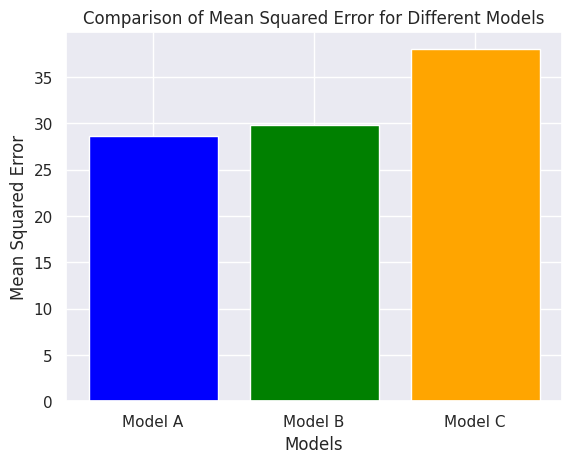

In [43]:
import matplotlib.pyplot as plt

# Sample model names and mean squared error values
models = ['Model A', 'Model B', 'Model C']
mse_values = [MAE1, MAE2, MAE3]

# Create a bar plot
plt.bar(models, mse_values, color=['blue', 'green', 'orange'])
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.title('Comparison of Mean Squared Error for Different Models')

# Show the plot
plt.show()


In [44]:
sc_x = StandardScaler()
iX_train = sc_x.fit_transform(iX_train)
iX_test = sc_x.transform(iX_test)

# Train a linear regression model on the training data
model = LinearRegression()
model.fit(iX_train, iy_train)

# Prediction values
iy_pred = model.predict(iX_test)

# Mean Absolute Error Validation
iMAE1 = mean_absolute_error(iy_test, iy_pred)
print(f"Mean Absolute Error for Linear Regression Model: {iMAE1:.2f}")

Mean Absolute Error for Linear Regression Model: 5.66


In [45]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(iX_train, iy_train)
iiy_pred = classifier.predict(iX_test)
iMAE2 = mean_absolute_error(iy_test, iiy_pred)
print(f"Mean Absolute Error for KNN Model: {iMAE2:.2f}")

Mean Absolute Error for KNN Model: 5.58


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [46]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(iX_train, iy_train)
iiiy_pred = classifier.predict(iX_test)
iMAE3 = mean_absolute_error(iy_test, iiiy_pred)
print(f"Mean Absolute Error for Decision Tree Model: {iMAE3:.2f}")

Mean Absolute Error for Decision Tree Model: 6.86


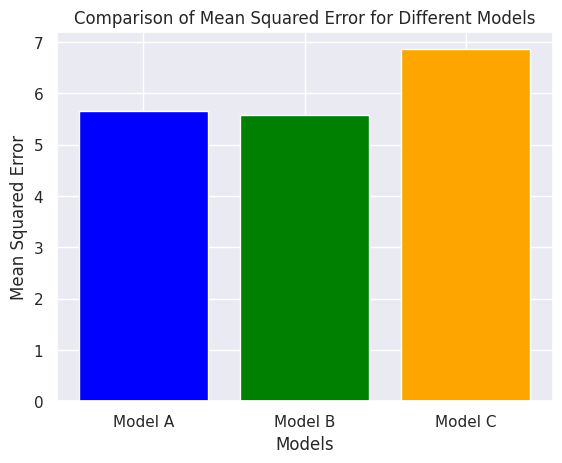

In [47]:
import matplotlib.pyplot as plt

# Sample model names and mean squared error values (replace with your values)
models = ['Model A', 'Model B', 'Model C']
mse_values = [iMAE1, iMAE2, iMAE3]  # Replace with your mean squared error values

# Create a bar plot
plt.bar(models, mse_values, color=['blue', 'green', 'orange'])
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.title('Comparison of Mean Squared Error for Different Models')

# Show the plot
plt.show()